# Corona-Fallzahlen im Landkreis Göttingen

Dieses Jupyter Notebook dient der Analysze und Visualisierung von Corona-Fallzahlen aus dem Landkreis Göttingen. Die Daten wurden mit Skripten aus [diesem git-Repository](https://github.com/nichtich/corona-goettingen) von der Homepage der Stadt Göttingen gesammelt.

Mitarbeit ist sehr willkommen, vor allem was die Visualisierung anbelangt!

## Daten laden

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtypes = {'datum': 'str', 'update': 'str', 'gemeinde': 'str', 'faelle': 'Int64', 'infizierte': 'Int64', 'quelle': 'int'}
zahlen = pd.read_csv('fallzahlen.csv', dtype=dtypes, parse_dates=['datum', 'update'])

## Visualisierung der Daten einer Gemeinde

In [3]:
gemeinde = "Stadt Göttingen"

<AxesSubplot:xlabel='datum'>

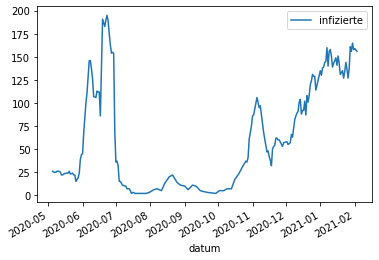

In [4]:
infizierte = zahlen[zahlen["gemeinde"]==gemeinde][['datum','infizierte']]
infizierte.set_index(['datum'],inplace=True)
infizierte.plot()

<AxesSubplot:xlabel='datum'>

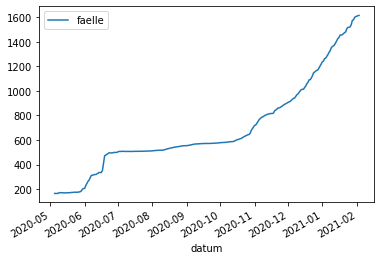

In [5]:
faelle = zahlen[zahlen["gemeinde"]==gemeinde][['datum','faelle']]
faelle.set_index(['datum'],inplace=True)
faelle.plot()

## Visualisierung der Daten mehrerer Gemeinden

In [10]:
gemeinden = zahlen["gemeinde"].unique()
gemeinden = ['Gemeinde Rosdorf','Gemeinde Gleichen','Gemeinde Friedland']

array(['Flecken Adelebsen', 'Flecken Bovenden',
       'Gemeinde Bad Grund (Harz)', 'Gemeinde Friedland',
       'Gemeinde Gleichen', 'Gemeinde Rosdorf', 'Gemeinde Staufenberg',
       'Gemeinde Walkenried', 'Samtgemeinde Dransfeld',
       'Samtgemeinde Gieboldehausen',
       'Samtgemeinde Hattorf am Harz und Stadt Herzberg am Harz',
       'Samtgemeinde Radolfshausen', 'Stadt Bad Lauterberg im Harz',
       'Stadt Bad Sachsa', 'Stadt Duderstadt', 'Stadt Hann. Münden',
       'Stadt Osterode am Harz', 'Samtgemeinde Hattorf am Harz',
       'Stadt Göttingen', 'Stadt Herzberg am Harz'], dtype=object)

In [7]:
infizierte = zahlen[['datum','gemeinde','infizierte']][zahlen["gemeinde"].isin(gemeinden)]

<AxesSubplot:xlabel='datum'>

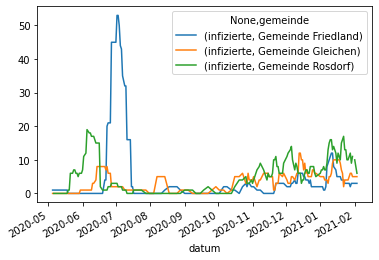

In [8]:
infizierte.pivot(index='datum', columns=['gemeinde']).plot()

# Summe aller Gemeinden

In [51]:
infizierte = zahlen.groupby('datum')['infizierte'].sum().to_frame()

In [57]:
stadt = zahlen[zahlen["gemeinde"]=="Stadt Göttingen"][['datum','infizierte']]
stadt.set_index(['datum'],inplace=True)
stadt.rename(columns={"infizierte": "Stadt Göttingen"},inplace=True)
stadt

,Stadt Göttingen
datum,
2020-05-05,26
2020-05-06,25
2020-05-07,25
2020-05-08,25
2020-05-09,26
...,...
2021-01-29,156
2021-01-30,165
2021-01-31,158


In [54]:
alle = pd.concat([infizierte, stadt], axis=1)

<AxesSubplot:xlabel='datum'>

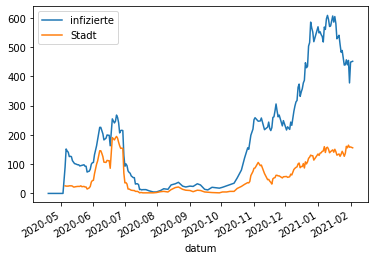

In [56]:
alle.plot()